# Stack Overflow Annual Developer Survey 2017

In [1]:
import pandas
import matplotlib
import numpy

In [2]:
%matplotlib inline

In [3]:
# first column is respondent id
all_df = pandas.read_csv('data/survey_results_public.csv', index_col=0)
all_df.info()
# preview the data
all_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51392 entries, 1 to 51392
Columns: 153 entries, Professional to ExpectedSalary
dtypes: float64(6), object(147)
memory usage: 60.4+ MB


,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
Respondent,,,,,,,,,,,,,,,,,,,,,
1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Languages Split

In [4]:
all_df['HaveWorkedLanguage'] = all_df['HaveWorkedLanguage'].str.split('; ')
all_df['WantWorkLanguage'] = all_df['WantWorkLanguage'].str.split('; ')

## Currency Conversion

Assuming that the `NaN` in *Currency* column means dollars ($).
The Stack Overflow Annual Developer Survey 2017
[Methodology](https://insights.stackoverflow.com/survey/2017#methodology) states:

> We converted salaries given in the 38 most-frequently-used currencies to [dollars / Euros / pounds sterling]
> using the exchange rate that prevailed mid-way through the survey field period.

Also the data on [survey result page](https://insights.stackoverflow.com/survey/2016) are in dollars.

In [5]:
# different currencies
all_df['Currency'].unique()

array([nan, 'British pounds sterling (£)', 'Canadian dollars (C$)',
       'U.S. dollars ($)', 'Euros (€)', 'Brazilian reais (R$)',
       'Indian rupees (?)', 'Polish zloty (zl)', 'Swedish kroner (SEK)',
       'Russian rubles (?)', 'Swiss francs', 'Australian dollars (A$)',
       'Mexican pesos (MXN$)', 'Japanese yen (¥)',
       'Chinese yuan renminbi (¥)', 'Singapore dollars (S$)',
       'Bitcoin (btc)', 'South African rands (R)'], dtype=object)

In [6]:
# source (27. 10. 2017) https://www.cnb.cz/cs/financni_trhy/devizovy_trh/kurzy_devizoveho_trhu/denni_kurz.jsp
# dictionary of exchange rates to CZK
currencies = {
    'British pounds sterling (£)': 28.747,
    'Canadian dollars (C$)': 17.017,
    'U.S. dollars ($)': 21.779,
    numpy.nan: 21.779,
    'Euros (€)': 25.585,
    'Brazilian reais (R$)': 6.730,
    'Indian rupees (?)': 33.579 / 100,
    'Polish zloty (zl)': 6.041,
    'Swedish kroner (SEK)': 2.632,
    'Russian rubles (?)': 37.768 / 100,
    'Swiss francs': 21.915,
    'Australian dollars (A$)': 16.785,
    'Mexican pesos (MXN$)': 1.144,
    'Japanese yen (¥)': 19.136,
    'Chinese yuan renminbi (¥)': 3.283,
    'Singapore dollars (S$)': 15.988,
    'Bitcoin (btc)': 5862.19 * 21.779,
    'South African rands (R)': 1.529
}

def convert_to_czk(df, currencies=currencies):
    return df['Salary'] * df['Currency'].apply(currencies.get)

In [7]:
# create new column
all_df['SalaryCZK'] = convert_to_czk(all_df)

## How many people filled the survery?

In [8]:
print('Number of people who filled the survey:')
# Index.size return the number of elements in the underlying data
print(all_df.index.size)

Number of people who filled the survey:
51392


## How many of them were from Czechia or Slovakia?

Relevant column is *Country (Q110. In which country do you currently live?)*.
Combo box was provided.
Czech Republic and Slovak Republic are items of interest.

In [9]:
cs_idx = ((all_df['Country'] == 'Czech Republic') | (all_df['Country'] == 'Slovak Republic'))
cs_df = all_df[cs_idx]
print('Number of people from Czechia and Slovakia:')
print(cs_idx.sum())

Number of people from Czechia and Slovakia:
581


## What is programmers' annaul salary in Czechia and Slovakia according to the survey? In the world?

Relevant column *Salary (Q320. What is your current annual salary, in \[currency from Q310\]?
Please enter a whole number in the box below, without any punctuation. If you prefer not to
answer, please leave the box empty / blank.)*.
It is a 10-digit whole number.
The person has to be professional software and currently employed.
Currency is in column *Currency*.

In [10]:
def notnull_salary(df):
    return df.loc[df['SalaryCZK'].notnull(), ['SalaryCZK', 'Currency']]

cs_salary = notnull_salary(cs_df)
cs_salary.head()

,SalaryCZK,Currency
Respondent,,
1484,276288.018794,NaN
1913,341096.319499,NaN
3367,409315.583399,NaN
3609,577725.806452,Euros (€)
3917,469007.439311,NaN


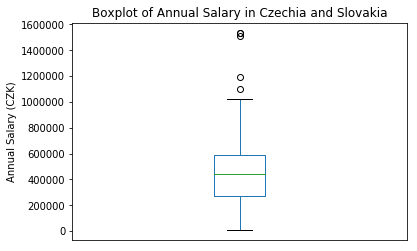

In [11]:
ax = cs_salary.plot.box()
ax.set_ylabel('Annual Salary (CZK)')
ax.set_xticks([])
_ = ax.set_title('Boxplot of Annual Salary in Czechia and Slovakia')

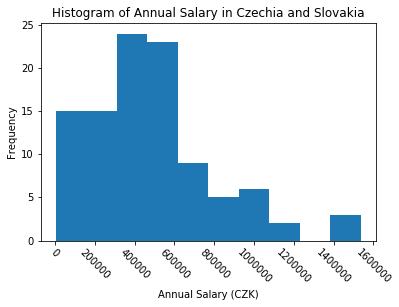

In [12]:
ax = cs_salary.plot.hist(rot=315)
ax.set_title('Histogram of Annual Salary in Czechia and Slovakia')
ax.legend_.remove()
_ = ax.set_xlabel('Annual Salary (CZK)')

In [13]:
cs_salary.describe()

,SalaryCZK
count,1.020000e+02
mean,4.849463e+05
std,3.259255e+05
min,5.542815e+03
25%,2.754026e+05
50%,4.452096e+05
75%,5.906401e+05
max,1.534933e+06


In [14]:
print('Average annual salary of programmers in Czechia and Slovakia:')
print(cs_salary['SalaryCZK'].mean(), 'CZK')

Average annual salary of programmers in Czechia and Slovakia:
484946.312173 CZK


IMHO median is more robust statistic (resistant to outliers).

In [15]:
print('Median annual salary of programmers in Czechia and Slovakia:')
print(cs_salary['SalaryCZK'].median(), 'CZK')

Median annual salary of programmers in Czechia and Slovakia:
445209.5923746009 CZK


In [16]:
all_salary = notnull_salary(all_df)

print('Average annual salary of programmers in world:')
print(all_salary['SalaryCZK'].mean(), 'CZK\n')
print('Median annual salary of programmers in world:')
print(all_salary['SalaryCZK'].median(), 'CZK')

Average annual salary of programmers in world:
3180864.90974 CZK

Median annual salary of programmers in world:
1155451.6129032245 CZK


The gap between mean and median is more significant here because of huge outliers (see boxplot below).

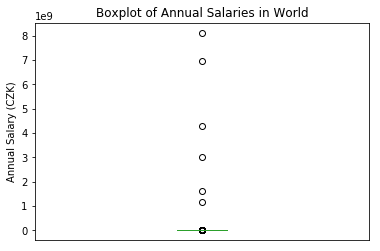

In [17]:
ax = all_salary.plot.box()
ax.set_ylabel('Annual Salary (CZK)')
ax.set_xticks([])
_ = ax.set_title('Boxplot of Annual Salaries in World')

## Python Statistics

Using a language means that the person was intensively working with it for the last year.

1. How many people stated that they use Python?
2. How many people from them want to continue using Python?
3. How many people do not use Python but want to start using it?

In [18]:
def contains_language(series, language):
    # fillna so that return value can be used as index
    return series.apply(lambda langs: False if langs is numpy.nan else language in langs)

def have_worked_in(df, language):
    return contains_language(df['HaveWorkedLanguage'], language)

def want_work_in(df, language):
    return contains_language(df['WantWorkLanguage'], language)

def language_stats(df, language):
    use_idx = have_worked_in(df, language)
    use = use_idx.sum()
    stick = want_work_in(df.loc[use_idx], language).sum()
    want_idx = want_work_in(df, language)
    want = ((want_idx ^ use_idx) & ~use_idx).sum()
    return use, stick, want

def print_language_stats(df, language):
    use, stick, want = language_stats(df, language)
    print(('Number of people in Czechia and Slovakia who use {}:\n'
           '{}\n\n'
           'Number of people in Czechia and Slovakia from them who want to continue using {}:\n'
           '{}\n\n'
           'Number of people in Czechia and Slovakia who don\'t use {} but want to start:\n'
           '{}').format(language, use, language, stick, language, want))

In [19]:
print_language_stats(cs_df, 'Python')

Number of people in Czechia and Slovakia who use Python:
129

Number of people in Czechia and Slovakia from them who want to continue using Python:
86

Number of people in Czechia and Slovakia who don't use Python but want to start:
48


## Answer the last three questions for Java instead of Python.

In [20]:
print_language_stats(cs_df, 'Java')

Number of people in Czechia and Slovakia who use Java:
171

Number of people in Czechia and Slovakia from them who want to continue using Java:
98

Number of people in Czechia and Slovakia who don't use Java but want to start:
23


## Draw a plot showing average *monthly* salary for each programming language which people from Czechia and Slovakia stated.

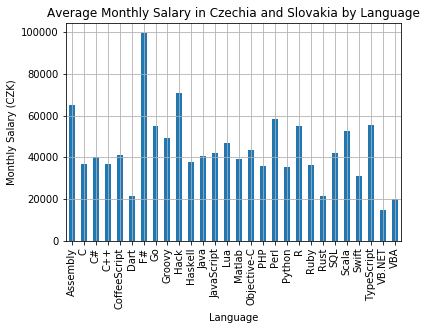

In [21]:
# get only relevant rows
cs_relevant = cs_df[cs_df['HaveWorkedLanguage'].notnull() & cs_df['SalaryCZK'].notnull()]

# create languages with id dataframe
langs = cs_relevant['HaveWorkedLanguage'].apply(pandas.Series).stack()
langs.index = langs.index.droplevel(level=1)
langs = pandas.DataFrame(langs, columns=['Language'])
# merge them back to get language and salary pair
langs = langs.merge(cs_relevant[['SalaryCZK']], how='left', left_index=True, right_index=True)

ax = langs.groupby('Language').mean().div(12).plot.bar()
ax.set_title('Average Monthly Salary in Czechia and Slovakia by Language')
ax.set_xlabel('Language')
ax.legend_.remove()
ax.grid()
_ = ax.set_ylabel('Monthly Salary (CZK)')